In [1]:
import sys
print(sys.version)
# should be 3.6

3.6.8 (default, May  7 2019, 14:58:50) 
[GCC 5.4.0 20160609]


In [2]:
from datetime import datetime
start_time = datetime.now()
print('start_time:', start_time)

start_time: 2019-11-13 17:40:04.823877


# pbi.ai templates
## Return of Experience

This is the Czech version of our template. If you don't speak Czech, see the English version at http://bit.ly/AI_template_personalization

Zdravíme všechny nadšence do dat a umělé inteligence!

Tato šablona navazuje na náš článek Return of Experience ( http://bit.ly/31lQSto ).  Jde o praktickou ukázku toho, jak Vám může při řešení personalizace obsahu pomoci Data Science a AI (Artificial Intelligence).

**Umělá inteligence není pouze o zdrojovém kódu. Stejně tak nelze vykouzlit reálnou přidanou hodnotu z pouhého filozofování a teoretizování o tom, co by se mohlo stát, kdyby...**

Proto se snažíme spojit teorii s praxí jak je to jen možné. Věříme, že naše šablona pomůže AI expertům, data scientistům, marketingový profesionálům, business analytikům a obecně všem, pro které jsou data denní chleba. Proč znovuvynalézat kolo?

Jak může umělá inteligence pomoci Vaší firmě? Navštivte náš blog, kde se dozvíte užitečné tipy a informace:
- http://bit.ly/ecommerce_academy_blog (česká verze)
- http://bit.ly/pbiai-blog (anglická verze)

Máte nápad na nový AI produkt? Rádi byste začali s data-driven procesy? Rádi pomůžeme :)

Kontaktujte nás prostřednictvím našeho webu
- https://www.pbi.ai/

nebo sociálních sítí
- facebook https://www.facebook.com/pbiai/
- LinkedIn https://www.linkedin.com/company/18178189/
- Twitter https://twitter.com/pbi_ai


A teď hurá na věc!


## Obsah šablony
### 1 Data
#### 1.1 Analýza dat: množství dat obecně
#### 1.2 Analýza dat: rozložení v čase
#### 1.3 Analýza dat: zákaznické segmenty
#### 1.4 Analýza dat: segmenty kategorií
### 2 Experimenty a prototypování AI
#### 2.1 Ručně vytvořená pravidla
#### 2.2 Strojové učení
#### 2.3 Shrnutí experimentů

## 1 Data

**Umělá inteligence je dobrá maximálně tak, jak dobré jsou data.** Výsledek záleží na tom, zda data obsahují klíčové informace, na kterých závisí řešený problém. Této problematice se věnujeme v článku https://www.ecommerce-academy.cz/post/serial-uvod-do-ai-2

V naší šabloně budeme využívat dummy data, která se dají připodobnit k těm, které můžeme získat v e-commerce. Bude se jednat o historii transakcí (nákupů).

In [3]:
import pandas as pd # knihovna pro manipulaci s daty

# načteme data o transakcích
purchases = pd.read_csv("dummy_data_purchases.csv", sep=',')
# načteme data o zákaznících
customers = pd.read_csv("dummy_data_customers.csv", sep=',')
# načteme data o položkách
items = pd.read_csv("dummy_data_items.csv", sep=',')

# převedeme časový údaj na datetime objekt pro usnadnění další práce
purchases['timestamp'] = purchases['timestamp'].apply(
    lambda timestamp_string: datetime.strptime(timestamp_string, '%Y-%m-%d %H:%M:%S.%f')
)

Prvních pět řádků datasetu **purchases**:

In [4]:
purchases[:5]

customerid  itemid                  timestamp     price
0       11779   45481 2018-02-17 11:09:09.629588  12783.20
1       15492   45481 2019-02-20 02:01:51.322820  12648.64
2       11480   45481 2018-04-12 07:01:25.615314  13456.00
3       10002   45481 2018-05-09 10:01:18.987823  12244.96
4       16456   45481 2019-02-07 19:01:58.634323  13186.88

Prvních pět řádků datasetu **customers**:

In [5]:
customers[:5]

customerid  locationid  agegroupid  sexid
0       10000           7           0      0
1       10001           9           4      1
2       10002           2           2      0
3       10003           5           0      0
4       10004           5           0      0

Prvních pět řádků datasetu **items**:

In [6]:
items[:5]

itemid  categoryid  colorid  price_default
0       6           0        6          10140
1   32775           3        1          16845
2       8           5        3           6904
3   32777           2        6          18930
4   32779           2        0           3557

In [7]:
# propojíme transakce s daty o zákaznících a položkách
purchases = pd.merge(purchases, customers, on='customerid')
purchases = pd.merge(purchases, items, on='itemid')

Prvních pět řádků datasetu **purchases** po propojení s ostatními informacemi:

In [8]:
purchases[:5]

customerid  itemid                  timestamp     price  locationid  \
0       11779   45481 2018-02-17 11:09:09.629588  12783.20          12   
1       15492   45481 2019-02-20 02:01:51.322820  12648.64          13   
2       11480   45481 2018-04-12 07:01:25.615314  13456.00          14   
3       10002   45481 2018-05-09 10:01:18.987823  12244.96           2   
4       16456   45481 2019-02-07 19:01:58.634323  13186.88          12   

   agegroupid  sexid  categoryid  colorid  price_default  
0           0      0           3        4          13456  
1           3      0           3        4          13456  
2           3      0           3        4          13456  
3           2      0           3        4          13456  
4           0      1           3        4          13456

Nyní každý řádek obsahuje následující údaje:

`customerid`: unikátní identifikátor zákazníka

`itemid`: unikátní identifikátor položky

`timestamp`: čas transakce

`price`: cena položky při provedení transakce (včetně slev)

`locationid`: unikátní identifikátor lokality zákazníka

`agegroupid`: unikátní identifikátor věkové skupiny zákazníka

`sexid`: unikátní identifikátor pohlaví zákazníka

`categoryid`: unikátní identifikátor kategorie položky

`colorid`: unikátní identifikátor barvy položky

`price_default`: základní cena položky (před slevami)

**Tvorba nástrojů pro personalizaci je proces zachycení vazeb mezi zákazníky a produkty.** Z toho důvodu je vhodné provést analýzu rozložení dat a zkontrolovat, že naše data obsahují dostatek informací.

**Co prozkoumat:**
- množství dat obecně
- rozložení dat v čase a s tím související nestandardní stavy (Vánoce, výprodeje)
- rozložení dat vůči zákaznickým segmentům
- rozložení dat vůči položkám

Úvodní analýza nám pomůže rozhodnout, kterou AI metodu zvolit pro řešení našeho problému. Pojďme na to!

### 1.1 Analýza dat: množství dat obecně

In [9]:
from collections import Counter # propočítává počty prvků v poli

print('Počet řádků:', purchases.shape[0])
for column_name in ['customerid', 'itemid', 'categoryid', 'colorid']:
    print('Počet různých %s: %d' % (
        column_name,
        len(set(purchases[column_name]))
    ))

print('\nPočet řádků s chybějící hodnotou:', Counter(pd.isnull(purchases).any(axis=1))[True])
    
print('\nmin čas:', min(purchases['timestamp']))
print('max čas:', max(purchases['timestamp']))

print('\nmin cena:', min(purchases['price']))
print('max cena:', max(purchases['price']))

Počet řádků: 66658
Počet různých customerid: 9990
Počet různých itemid: 10337
Počet různých categoryid: 6
Počet různých colorid: 9

Počet řádků s chybějící hodnotou: 0

min čas: 2018-02-13 00:18:49.821487
max čas: 2019-04-23 22:01:21.205666

min cena: 1.6
max cena: 24996.0


Celkem máme **~66k transakcí provedených ~10k různými zákazníky během ~14 měsíců** což je přibližně **jedna transakce za dva měsíce na zákazníka**. Raději bychom měli trochu delší historii dat, ale pracovat by se s tím dalo. Přesnější pohled získáme z analýzy rozložení dat.

Máme **0 řádků s chybějící hodnotou**. To je dobrá zpráva. V opačném případě by bylo třeba zjistit, jakou mají chybějící hodnoty příčinu. **Před jakýmkoli modelováním musíme datům perfektně rozumět, včetně toho, jaká data je třeba odfiltrovat nebo nahradit.**

### 1.2 Analýza dat: rozložení v čase

Informace o rozložení dat v čase nám pomůže identifikovat **nestandardní výkyvy a časové periody, které je vhodné při strojovém učení odfiltrovat**. Našim cílem je mít dataset, který odpovídá podmínkám, které budou panovat po nasazení do produkce. Zjistíme také, zda je třeba vytvořit více modelů pro různé časové úseky (např. pracovní dny a víkendy).

In [10]:
import numpy as np # knihovna obsahující základní matematické funkce pro práci s maticemi
import matplotlib # knihovna pro tvorbu grafů
import matplotlib.pyplot as plt
import seaborn as sns # knihovna pro tvorbu grafů

%matplotlib inline

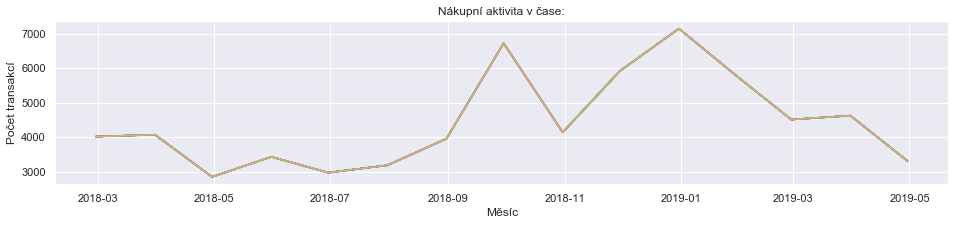

In [11]:
pd.plotting.register_matplotlib_converters() # konverter pro časové řady

sns.set(rc={'figure.figsize':(16, 3)})
plt.figure()
plt.title('Nákupní aktivita v čase:')
plt.plot(purchases.set_index('timestamp').resample('M').count())
plt.xlabel('Měsíc')
plt.ylabel('Počet transakcí')
plt.show()

Množství transakcí velice kolísá. Příčinou mohou být změny v obchodní a marketingové strategii, sezónnost prodeje nebo podobné jevy. Také mohla probíhat úprava infrastruktury nebo nastaly problémy při přenosu a ukládání dat. Pokud by se jednalo o reálný projekt, pídili bychom se po tom, co se dělo v jednotlivých periodách. **Důležitá je informace o tom, jak probíhala tvorba dat a související ETL procesy** (ETL - Extract-Transform-Load). Jedině tak zjistíme, jak data správně interpretovat.

### 1.3 Analýza dat: zákaznické segmenty

Pokud chceme zjistit vazby mezi zákazníky a položkami, potřebujeme dostatek dat od zákazníků, kteří koupili alespoň dvě různé položky. Taková informace naznačuje, že může být mezi těmito položkami nějaká souvislost. V případě, že máme povětšinou "jednorázové" zákazníky, nebude modelování jednoduché. Budeme odkázáni na dostupnost demografických dat a dalších údajů o zákaznících, které mohou sloužit pro výpočet podobnosti mezi jednotlivými zákazníky, a tedy i pro výpočet relevance mezi položkami, které nakoupili. **Takzvaná "people data" jsou však zákeřná. Pokud problematiku podceníme, riskujeme, že vytvoříme nepoužitelný model.** Etické aspekty využití AI rozebíráme v našem článku https://www.ecommerce-academy.cz/post/serial-uvod-do-ai-6

Počet jednorázových zákazníků:  92


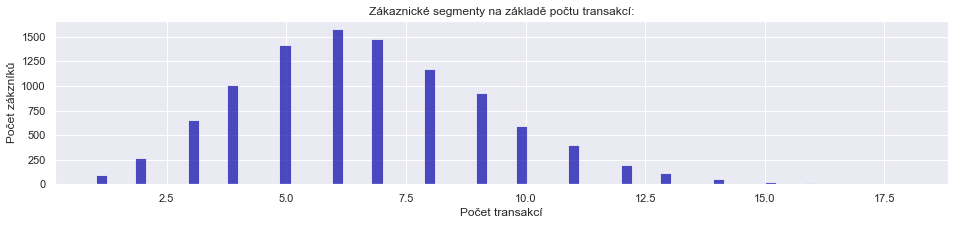

In [12]:
customer_purchases_count = purchases \
    .groupby(['customerid']).size() \
    .reset_index(name='number_of_purchases')

one_time_buyers = set(customer_purchases_count[customer_purchases_count['number_of_purchases'] == 1]['customerid'])
print('Počet jednorázových zákazníků: ', len(one_time_buyers))

plt.figure()
plt.title('Zákaznické segmenty na základě počtu transakcí:')
plt.hist(
    x=customer_purchases_count['number_of_purchases'],
    bins='auto',
    color='#0504aa',
    alpha=0.7,
    rwidth=0.85)
plt.xlabel('Počet transakcí')
plt.ylabel('Počet zákzníků')
plt.show()

**Jednorázoví zákazníci tvoří přibližně 1 %.** To není mnoho. Zatím se zdá, že pro reprezentaci vazeb mezi zákazníky a položkami bude dat dostatek.

Abychom tuto hypotézu potvrdili, provedeme obdobnou analýzu, nicméně zaměříme se na různorodost položek, které jednotliví zákazníci koupili. Pokud zákazník nakupuje opakovaně pouze jednu konkrétní položku, o vazbách s ostatními položkami se nedozvíme nic.

Počet zákazníků, kteří koupili pouze jednu položku (nezávisle na tom kolikrát): 92


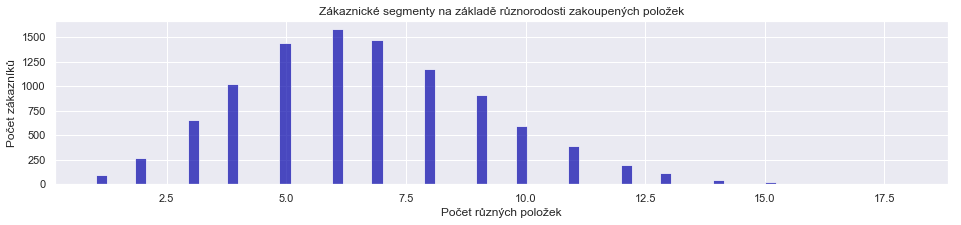

Počet zákazníků, kteří zakoupili zboží pouze jedné kategorie::  175


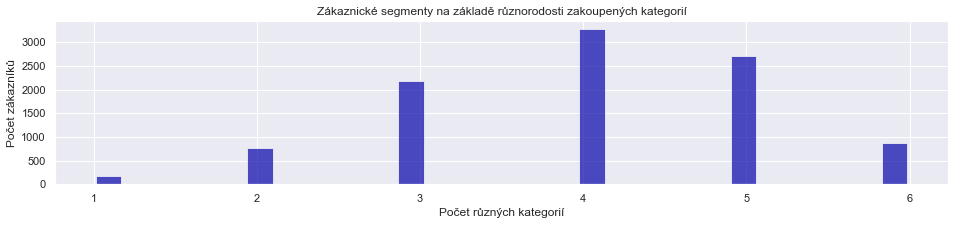

In [13]:
customer_purchases_items = purchases \
    .groupby(['customerid', 'itemid']).size() \
    .reset_index(name='counts') \
    .groupby(['customerid']).size() \
    .reset_index(name='item_variety_counts')

one_item_buyers = set(customer_purchases_items[customer_purchases_items['item_variety_counts'] == 1]['customerid'])
print('Počet zákazníků, kteří koupili pouze jednu položku (nezávisle na tom kolikrát):', len(one_item_buyers))

plt.figure()
plt.title('Zákaznické segmenty na základě různorodosti zakoupených položek')
plt.hist(
    x=customer_purchases_items['item_variety_counts'],
    bins='auto',
    color='#0504aa',
    alpha=0.7,
    rwidth=0.85)
plt.xlabel('Počet různých položek')
plt.ylabel('Počet zákazníků')
plt.show()


customer_purchases_categories = purchases \
    .groupby(['customerid', 'categoryid']).size() \
    .reset_index(name='counts') \
    .groupby(['customerid']).size() \
    .reset_index(name='category_variety_counts')

one_category_buyers = set(customer_purchases_categories[customer_purchases_categories['category_variety_counts'] == 1]['customerid'])
print('Počet zákazníků, kteří zakoupili zboží pouze jedné kategorie:: ', len(one_category_buyers))

plt.figure()
plt.title('Zákaznické segmenty na základě různorodosti zakoupených kategorií')
plt.hist(
    x=customer_purchases_categories['category_variety_counts'],
    bins='auto',
    color='#0504aa',
    alpha=0.7,
    rwidth=0.85)
plt.xlabel('Počet různých kategorií')
plt.ylabel('Počet zákazníků')
plt.show()

Počet "jednorázových" zákazníků je stejný jako počet zákazníků, kteří nakoupili pouze jeden druh zboží. Všichni ostatní tedy zakoupili alespoň dvě různé položky. Distribuce dat u nákupů jednotlivých položek je téměř totožná s distribucí u počtu nákupů obecně. Z toho můžeme vyvodit, že **zákazník koupí stejnou věc vícekrát pouze v minimu případů**.

Obdobně to vypadá u kategorií. **Téměř žádní zákazníci nenakoupí dvakrát ze stejné kategorie vícekrát.** To je dobrá zpráva, protože nejspíše budeme schopni zachytit vazby mezi jednotlivými položkami a kategoriemi.

Poslední věc, kterou v této části prozkoumáme, je **distribuce dat napříč vlastnostmi zákazníka**. Zajímá nás, kolik dat máme pro jednotlivé zákaznické segmenty. Na základě toho budeme schopni rozhodnout, pro které segmenty zákazníků má cenu model vytvořit. V této fázi zanalyzujeme pouze `sexid`, tedy preference položek na základě pohlaví. Analýzu lokality (`locationid`) přenecháme čtenářům.

sexid  number_of_purchases_overall
0      0                         4961
1      1                         5029

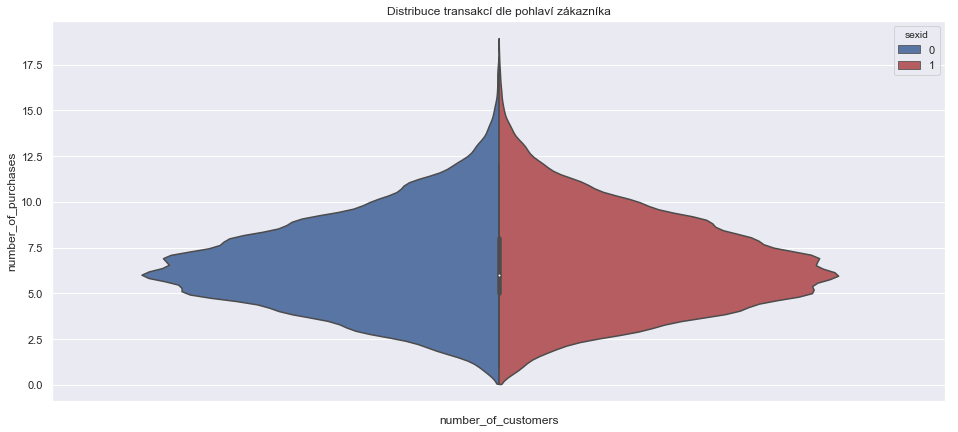

In [14]:
customer_purchases_sex = purchases \
    .groupby(['customerid', 'sexid']).size() \
    .reset_index(name='number_of_purchases')

customer_purchases_sex_overall = customer_purchases_sex \
    .groupby(['sexid']).size() \
    .reset_index(name='number_of_purchases_overall')

customer_purchases_sex['number_of_customers'] = ""

sns.set(rc={'figure.figsize':(16, 7)})
sns.violinplot(
    x="number_of_customers",
    y="number_of_purchases",
    hue="sexid",
    data=customer_purchases_sex,
    palette=['b','r'],
    split=True
).set_title('Distribuce transakcí dle pohlaví zákazníka')

customer_purchases_sex_overall

Data jsou rozloženy poměrně rovnoměrně. V opačném případě by bylo třeba zvážit, jak nerovnoměrnost zohlednit při experimentování.

### 1.4 Analýza dat: segmenty kategorií

Data o položkách můžeme analyzovat obdobně jako segmenty zákazníků. Cílem je zjistit, pro které položky a kategorie máme dostatek dat. **Pokud je málo položek, které byly koupeny více různými zákazníky, nemusí to pro tvorbu modelu stačit.** V takovém případě je namísto strojového učení vhodné použít ručně sestavená pravidla.

Maximální počet transakcí u jedné položky: 438


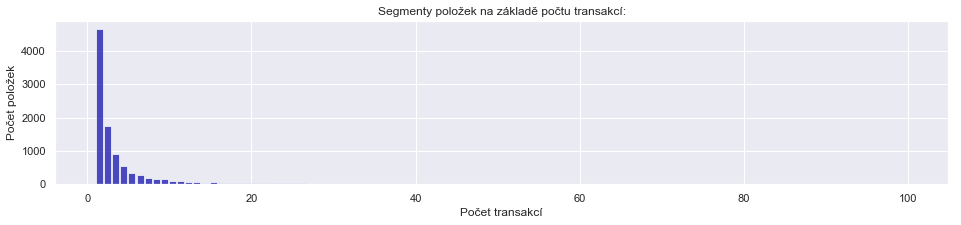

Distribuce transakcí napříč kategoriemi:


categoryid  number_of_purchases
0           0                11150
1           1                11572
2           2                10895
3           3                10532
4           4                11096
5           5                11413

In [15]:
item_purchases_count = purchases \
    .groupby(['itemid']).size() \
    .reset_index(name='counts')

print('Maximální počet transakcí u jedné položky:', max(item_purchases_count['counts']))

sns.set(rc={'figure.figsize':(16, 3)})
plt.figure()
plt.title('Segmenty položek na základě počtu transakcí:')
plt.hist(
    x=item_purchases_count[item_purchases_count['counts'] <= 100]['counts'],
    bins= 100,
    color='#0504aa',
    alpha=0.7,
    rwidth=0.85)
plt.xlabel('Počet transakcí')
plt.ylabel('Počet položek')
plt.show()

category_purchases_count = purchases \
    .groupby(['categoryid']).size() \
    .reset_index(name='number_of_purchases')

print('Distribuce transakcí napříč kategoriemi:')
category_purchases_count

**Většina položek byla zakoupena méně než pětkrát.** To není žádná sláva. Na druhou stranu **máme i extrémy, kdy byla jedna položka zakoupena více než stokrát**. U těchto položek by bylo vhodné zjistit, zda jsou pro modelování a personalizaci relevantní. Může se jednat o příslušenství které se zakupuje téměř ke každé objednávce. Takové položky je zbyečné zákazníkům nabízet.

**Rozložení transakcí napříč kategoriemi je vyrovnané.** To je dobrá zpráva. Stojí za úvahu zjistit, kolik je v které kategorii položek. Pokud kategorie zahrnuje příliš velké množství produktů, může být výhodnější vytvořit model na úrovni personalizace kategorií a nikoli položek. Tuto analýzu necháme na čtenáři.

A je to! Datům již rozumíme lépe a **víme na co si dát pozor při experimentování**.

## 2 Experimenty a prototypování AI

Analýza dat nám posloužila jako podklad pro rozhodování nad typem modelu, který bude schopen vyřešit zadaný problém. Kvalitní data a jednoduchý model je vždy lepší, nežli složitý model a nekvalitní data. Kvalitní data jsou taková data, která dostatečně pokrývají **prohledávací prostor řešení**.

V této šabloně rozebereme dva nejčastější přístupy k tvorbě nástrojů pro personalizaci:
- ručně vytvořená pravidla
- strojové učení

### 2.1 Ručně vytvořená pravidla

Pokud si nejsme jisti kvantitou a kvalitou dat, **expertní systém** je pravděpodobně ta nejlepší možnost, kterou máme.

Expertní systémy jsou zde téměř padesát let. Jedná se o natvrdo zakódovaný pravidlový rozhodovací strom. Pravidla tohoto stromu jsou založena na znalostech lidských expertů, případně, na statistické analýze dat. V e-commerce můžeme například použít následující pravidla:
- když je zima, doporuč kabát
- pokud zákazník nakoupil něco v minulosti, již mu tuto věc znovu nenabízej
- pokud si zákazník prohlíží kategorii "boty", nabídni mu něco z kategorie "pásky"

V naší šabloně nepracujeme s explicitními názvy proměnných. Používáme pouze identifikátory (`categoryid`, `productid` atd.). Expertně vytvořená pravidla tedy vynecháme a zaměříme se na statistiku.

V této šabloně provedeme analýzu vazeb mez `sexid` (pohlaví zákazníka), `colorid` (barva položky) a `categoryid` (kategorie položky).

Analýzu ostatních proměnných necháme čtenářům.

#### Ručně vytvořená pravidla - barva položky

Analýzu provedeme dvěma způsoby:
- jak souvisí pohlaví zákazníka s barvou položky
- jak souvisí barvy položek navzájem

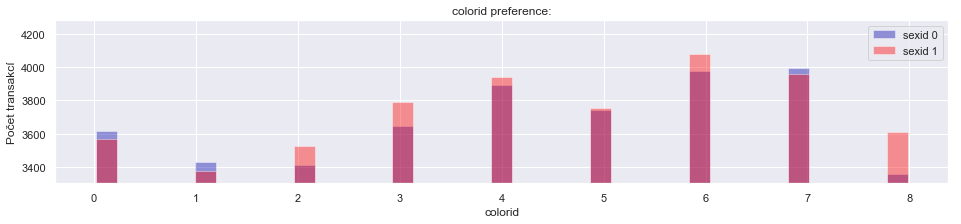

In [16]:
def preferencePlotSex(column_name, plot_setup=None):
    plt.figure()
    plt.title('%s preference:' % column_name)
    plt.hist(
        x=purchases[purchases['sexid'] == 0][column_name],
        bins='auto',
        color='#0504aa',
        alpha=0.4,
        rwidth=0.85,
        label='sexid 0')
    plt.hist(
        x=purchases[purchases['sexid'] == 1][column_name],
        bins='auto',
        color='red',
        alpha=0.4,
        rwidth=0.85,
        label='sexid 1')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel(column_name)
    plt.ylabel('Počet transakcí')
    if plot_setup:
        keys = set(list(plot_setup.keys()))
        if 'x_left' in keys: plt.xlim(left=plot_setup['x_left'])
        if 'x_right' in keys: plt.xlim(right=plot_setup['x_right'])
        if 'y_top' in keys: plt.ylim(top=plot_setup['y_top'])
        if 'y_bottom' in keys: plt.ylim(bottom=plot_setup['y_bottom'])
    plt.show()

sns.set(rc={'figure.figsize':(16, 3)})
plot_setup_color = {
    'y_bottom': 3300
}
preferencePlotSex('colorid', plot_setup_color)

Žádná silná vazba mexi pohlavím zákazníka a barvou položky není. Pouze `colorid` 8 je preferována o trochu více mezi `sexid` 1. (~3350 X ~3600).

Nyní se zaměříme na relevanci položek mezi sebou na základě jejich barvy. Tuto vazbu zjistíme tak, že se podíváme, kolik zákazníků, kteří zakoupili zboží jedné konkrétní barvy, zakoupilo zboží druhé konkrétní barvy. Pro asociační modelování tohoto typu je ideální matice. Definujme funkci, která ji vypočte:

In [17]:
def computeMatrix(data_frame, column_name):
    """
    Vytvoří symetrickou matici pro daný sloupec.
    Hodnota indexu [i, j] reprezentuje počet zákazníků,
    kteří zakoupili vedle položky s vlastnostmi 'i'
    i položku s vlastnostmi 'j'.
    
    Parametry
    ----------
    data_frame
        Pandas dataframe reprezentující transakce
    column_name
        Název sloupce, pro který bude matice sestavena
    """

    # připravíme proměnné
    # hodnoty sloupce column_name seřadíme pro usnadnění následné vizualizace
    column_values = list(set(data_frame[column_name]))
    column_values.sort()
    column_values_count = len(column_values)
    matrix = np.zeros(shape=(column_values_count, column_values_count))

    # vypočteme matici
    for i in range(column_values_count):
        # vybereme hodnotu sloupce, pro kterou vypočteme statistiku
        value = column_values[i]
        # vybereme zákazníky, kteří koupili položku s danou vlastností a hodnotou
        customerid_selection = set(data_frame[data_frame[column_name] == value]['customerid'])
        # vybraným zákazníkům přiřadíme data jejich transakcí
        data_frame_filtered = data_frame[
            purchases['customerid'].apply(lambda customerid: customerid in customerid_selection) == True
        ]
        # vypočteme hodnoty matice prostřednictvím agregace transakčních dat
        purchases_count = data_frame_filtered \
            .groupby(['customerid', column_name]).size() \
            .reset_index(name='number_of_purchases') \
            .groupby([column_name]).size() \
            .reset_index(name='number_of_customers')
        available_values = set(purchases_count[column_name])
        # upravíme matici
        matrix[i, i] = 0 # diagonálu matice nastavíme na 0
        for j in range(column_values_count):
            # hodnoty budeme hledat pouze pro jednu polovinu matice
            # druhou polovinu doplníme z již vypočtených hodnot,
            # protože matice je symetrická
            if (i == j) | (j < i):
                continue
            else:
                # zkontrolujeme, že existuje alespoň jeden
                # zákazník, který kromě položky 'i' nakoupil
                # i položku 'j'; pokud ano, doplníme matici
                if j in available_values:
                    customer_count = list(purchases_count[purchases_count[column_name] == j]['number_of_customers'])[0]
                    matrix[i, j] = customer_count
                    # doplníme symetrické pole z již vypočtené hodnoty
                    matrix[j, i] = customer_count
                else:
                    matrix[i, j] = 0
                    matrix[j, i] = 0
    
    return matrix

Nyní definujeme funkce pro vizualizace matice. Matplotlib takové funkce nabízí přímo ve své dokumentaci. Proto ji využijeme a nebudeme znovuvynalézat kolo. https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

In [18]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

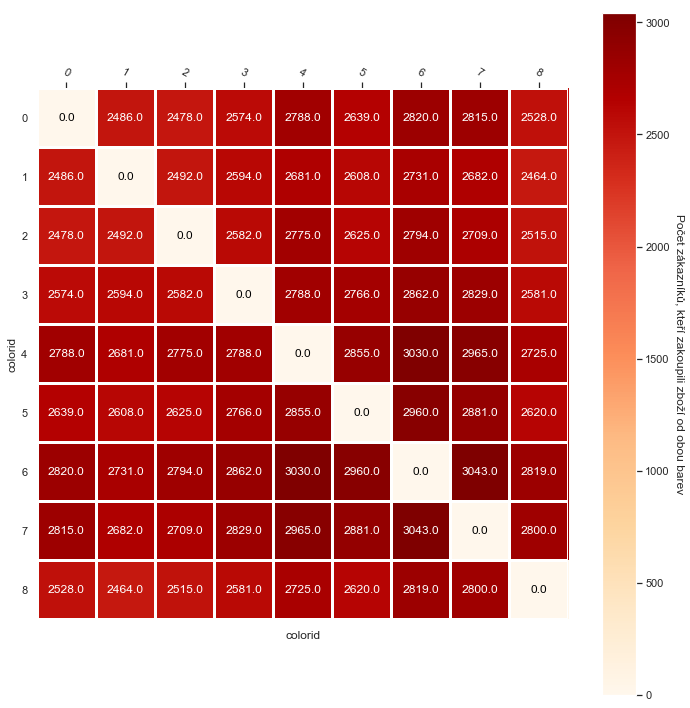

In [19]:
color_X_color_matrix = computeMatrix(purchases, 'colorid')
color_labels = list(set(purchases['colorid']))
color_labels.sort()

sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("dark")

fig, ax = plt.subplots()

im, cbar = heatmap(color_X_color_matrix, color_labels, color_labels, ax=ax,
                   cmap="OrRd", cbarlabel="Počet zákazníků, kteří zakoupili zboží od obou barev")
texts = annotate_heatmap(im, valfmt="{x}")
plt.xlabel('colorid')
plt.ylabel('colorid')

fig.tight_layout()
plt.show()

Hodnoty jsou vesměs podobné, žádná silná vazba tedy mezi barvami neexistuje. Máme dvě hodnoty nad 3000:
- 3043 (barva 6 a 7)
- 3030 (barva 4 a 6)

Na základě dosavadních poznatků můžeme zformulovat několik jednochých pravidel:
- pokud je `sexid` zákazníka 1, upřednostníme položku s `colorid` 8
- pokud je `colorid` položky 6, upřednostníme položku s `colorid` 7 nebo 4
- pokud je `colorid` položky 7, upřednostníme položku s `colorid` 6
- pokud je `colorid` položky 4, upřednostníme položku s `colorid` 6

Nyní provedeme to samé pro kategorie položek.

#### Ručně vytvořená pravidla - kategorie položky

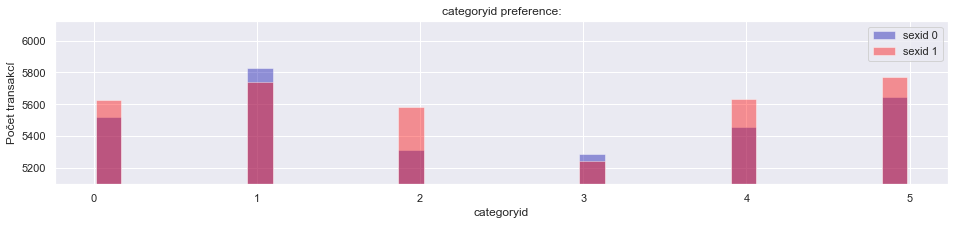

In [20]:
sns.set(rc={'figure.figsize':(16, 3)})
plot_setup_category = {
    'y_bottom': 5100
}
preferencePlotSex('categoryid', plot_setup_category)

Opět bez silných vazeb. Pouze kategorie 2 je mírně populárnější u pohlaví 1.

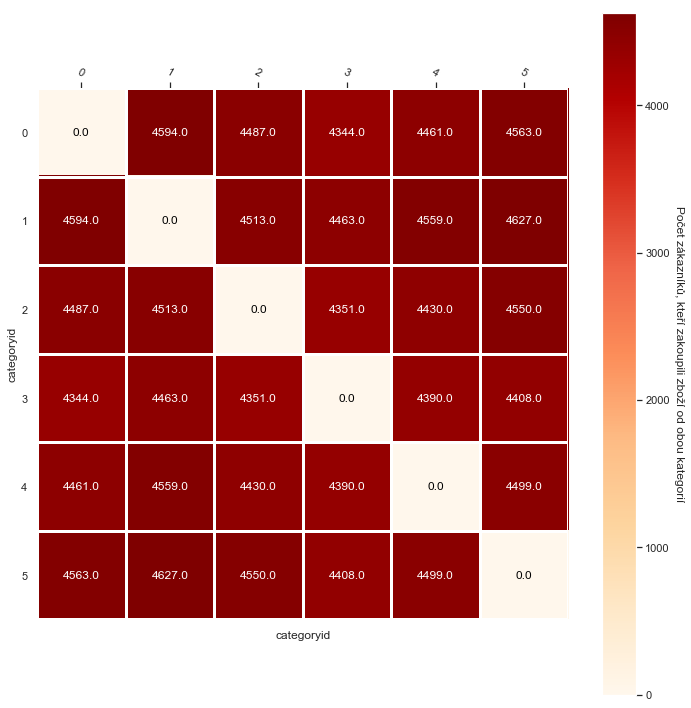

In [21]:
category_X_category_matrix = computeMatrix(purchases, 'categoryid')
category_labels = list(set(purchases['categoryid']))
category_labels.sort()

sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("dark")

fig, ax = plt.subplots()

im, cbar = heatmap(category_X_category_matrix, category_labels, category_labels, ax=ax,
                   cmap="OrRd", cbarlabel="Počet zákazníků, kteří zakoupili zboží od obou kategorií")
texts = annotate_heatmap(im, valfmt="{x}")
plt.xlabel('categoryid')
plt.ylabel('categoryid')

fig.tight_layout()
plt.show()

Hodnoty jsou vyrovnané obdobně jako v případě barvy položky. Nejvyšší hodnoty:
- 4627 (kategorie 1 a 5)
- 4594 (kategorie 0 a 1)

Poznatky opět shrneme do několika pravidel
- pokud je `sexid` zákazníka 1, upřednostníme položku s `categoryid` 2
- pokud je `categoryid` položky 1, upřednostníme položku s `categoryid` 0 nebo 5
- pokud je `categoryid` položky 0, upřednostníme položku s `categoryid` 1
- pokud je `categoryid` položky 5, upřednostníme položku s `categoryid` 1

#### Ručně vytvořená pravidla - sestavení modelu

Poté, co jsme vytvořili pravidla, můžeme přistoupit k definici jednoduchého pravidlového modelu pro personalizaci.

Budeme potřebovat dvě funkce. Jedna se bude starat o výpočet koeficientu při zohlednění našich pravidel, druhá bude sloužit pro výběr položek k doporučení.

In [22]:
import random # generátor náhodných čísel

def getCoefficient(customer_sex, item_color, item_category,
           item_color_selected, item_category_selected,
           promotion_rate=0.05):
    """
    Vrací koeficient na základě
    předem definovaných pravidel.
    
    Parametry
    ----------
    customer_sex
        sexid zákazníka
    item_color
        colorid položky, pro kterou doporučení provádíme
    item_category
        categoryid položky, pro kterou doporučení provádíme
    item_color_selected
        colorid položky, u které posuzujeme vhodnost pro doporučení
    item_category_selected
        categoryid položky, u které posuzujeme vhodnost pro doporučení
    promotion_rate
        míra zohlednění pravidel
        výchozí hodnota 0.05 (pravděpodobnost výběru
        položky pro doporučení se zvýší o 5 %)
    """
    coefficient = 1
    promotion = 1 + promotion_rate
    
    if (customer_sex == 1) and (item_color_selected == 8):
        coefficient *= promotion
        
    if (item_color == 4) and (item_color_selected == 6):
        coefficient *= promotion
        
    if (item_color == 6) and (item_color_selected == 4 or item_color_selected == 7):
        coefficient *= promotion
        
    if (item_color == 7) and (item_color_selected == 6):
        coefficient *= promotion
        
    if (customer_sex == 1) and (item_category_selected == 2):
        coefficient *= promotion
        
    if (item_category == 0) and (item_category_selected == 1):
        coefficient *= promotion
        
    if (item_category == 1) and (item_category_selected == 0 or item_category_selected == 5):
        coefficient *= promotion
        
    if (item_category == 5) and (item_category_selected == 1):
        coefficient *= promotion
        
    return coefficient

def recommendItemsRules(item_data_frame, customer_data_frame,
                   item_id_selected, customerid, n):
    """
    Vrátí seznam položek,
    které jsou vhodné pro doporučení
    na základě pravidel.
    
    Parametry
    ----------
    item_data_frame
        Pandas dataframe obsahující údaje o položkách
    customer_data_frame
        Pandas dataframe obsahující údaje o zákaznících
    item_id_selected
        itemid položky, pro kterou doporučení provádíme
    customerid
        customerid zákazníka, pro kterého doporučení provádíme
    n
        počet položek, které chceme doporučit
    """
    # všem položkám přiřadíme náhodné score (pravděpodobnost doporučení)
    item_data_frame['score'] = item_data_frame['itemid'].apply(lambda x: random.random())

    # zjistíme sexid zákazníka
    customer = customer_data_frame[customer_data_frame['customerid'] == customerid]
    customer_sex = list(customer['sexid'])[0]
    
    # zjistíme colorid a categoryid položky
    item_row_selected = item_data_frame[item_data_frame['itemid'] == item_id_selected]
    item_color_selected = list(item_row_selected['colorid'])[0]
    item_category_selected = list(item_row_selected['categoryid'])[0]
    
    # upravíme pravděpodobnost doporučení pomocí
    # funkce getCoef zohledňující pravidla
    item_data_frame['score'] = item_data_frame.apply(
        lambda row: row['score']*getCoefficient(
            customer_sex,
            item_color_selected,
            item_category_selected,
            row['colorid'],
            row['categoryid']),
        axis=1
    )
    
    # vynulujeme score položky, pro kterou doporučení provádíme
    item_data_frame.loc[item_data_frame['itemid'] == item_id_selected, 'score'] = 0
    
    # seřadíme položky dle jejich score (pravděpodobnost doporučení)
    sorted_items = item_data_frame[['itemid', 'score']].sort_values(by ='score', ascending=False)
    # pokud je n větší než počet položek, snížíme jej na tento počet
    number_to_recommend = min(n, sorted_items.shape[0])
    
    # z datasetu položek odstraníme sloupec score,
    # který již dále nebudeme potřebovat
    item_data_frame.drop(columns=['score'], inplace=True)
    
    return list(sorted_items['itemid'][:number_to_recommend])
    

Nyní náš recommender vyzkoušíme.


Nejprve vytvoříme testovací data. V našem případě to bude několik dvojic `customerid`-`itemid` reprezentující, že si konkrétní zákazník prohlíží konkrétní položku.

In [23]:
# počet dvojic
testing_data_count = 5

dataset_test = pd.DataFrame(
    {
        'customerid': [
            customers.loc[random.choice(customers.index)]['customerid']
            for i in range(testing_data_count)
        ],
        'itemid': [
            items.loc[random.choice(items.index)]['itemid']
            for i in range(testing_data_count)
        ]
    }
)
print('Prvních pět řádků našeho testovacího datasetu:')
dataset_test[:5]

Prvních pět řádků našeho testovacího datasetu:


customerid  itemid
0       13506   31277
1       18188   19118
2       11604   34762
3       19069   42760
4       10839   46357

Po vytvoření testovacích dat přichází na řadu zkouška recommenderu:

In [24]:
# počet položek, které budeme chtít doporučit
items_to_recommend = 3
dataset_test['recommendation_rules'] = dataset_test.apply(
    lambda purchase: recommendItemsRules(
        items,
        customers,
        purchase['itemid'],
        purchase['customerid'],
        items_to_recommend
    ), axis=1
)
print('Prvních pět řádků našeho testovacího datasetu po použití recommenderu:')
dataset_test[:5]

Prvních pět řádků našeho testovacího datasetu po použití recommenderu:


customerid  itemid   recommendation_rules
0       13506   31277   [29781, 5160, 31978]
1       18188   19118  [34191, 21780, 30734]
2       11604   34762  [29149, 45178, 28479]
3       19069   42760  [29005, 41283, 37170]
4       10839   46357  [33502, 31318, 30025]

### 2.2 Strojové učení

Využití umělé inteligence při personalizaci můžeme obecně rozdělit do dvou kategorií:
1. vzájamná relevance zákazníků a položek na základě transakční historie
2. výpočet vzájemné podobnosti položek nebo zákazníků na základě textu (popisky produktů, tagy, komunikace) nebo obrazu (obrázky produktů)

Možnost 2. je již předmětem mnoha jiných studií zaměřených na zpracování obrazu a přirozeného jazyka. Složitost této problematiky výrazně přesahuje rámec této šablony. Proto se v našem případě pustíme pouze do varianty 1.

#### Strojové učení - matice podobnosti

Jeden z nejčastějších způsobů, jak reprezentovat asociativní model, v našem případě vzájemnou relevanci položek, je matice podobnosti. V minulé části jsme matici používali pro reprezentaci toho, kolik zákazníků zakoupilo produkty více barev nebo z více kategorii. Podobný přístup využijeme i nyní.

Matice podobnosti je symetrická matice, kde index `[i, j]` reprezentuje podobnost mezi položkou `i` a položkou `j`. Na začátku je matice vyplněna nulami, jedničkami, případně jinou hodnotou (v našem příkladu 0,5). Hodnoty matice se průběžně upravují s přibývajícím  množstvím transakcí.

Náš algoritmus bude využívat dvě funkce - `updateMatrix()` a `recommendItemsMatrix()`. Funkce `updateMatrix()` provede aktualizaci matice na základě konkrétní transakce. `recommendItemsMatrix()` bude obdobná funkci `recommendItemsRules()` z minulé pasáže a bude vracet seznam položek pro doporučení.
Model budeme reprezentovat prostřednictvím dvou matic - `item_X_item` a `customer_X_item`. Matice `item_X_item` bude obsahovat podobnosti položek navzájem. `customer_X_item` bude pomocná matice obsahující informaci o tom, které položky který zákazník zakoupil.

In [25]:
itemids = list(set(items['itemid']))
item_X_item = np.full((items.shape[0], items.shape[0]), 0.5)
# diagonála naší matice bude 0, jelikož tu
# samou položku nemá smysl zákazníkovi nabízet
np.fill_diagonal(item_X_item, 0)

customer_X_item = np.zeros(shape=(customers.shape[0], items.shape[0]))

In [26]:
def updateRow(similarity_matrix, customer_X_item_matrix,
              index_customer, index_item,
              promotion_rate=0.005):
    """
    Upraví pole matice podobnosti
    na základě transakce.
    
    Parametry
    ----------
    similarity_matrix
        Symetrická numpy matice, kde index [i, j]
        představuje podobnost mezi položkou `i` a položkou `j`
    customer_X_item_matrix
        Numpy matice, kde index [i, j] nabývá hodnoty
        1 pokud zákazník `i` v minulosti zakoupil
        položku `j`; v opačném případě je hodnota 0
    index_customer
        index daného customerid v matici customer_X_item_matrix
    index_item
        index daného itemid v matici  similarity_matrix
    promotion_rate
        hodnota, o kterou zvýšíme index matice similarity_matrix
        při aktualizaci (v podstatě rychlost učení)
    """
    # zjistíme, které pole budeme upravovat
    customer_X_item_matrix[index_customer, index_item] = 1
    customer_stats = customer_X_item_matrix[index_customer,:]
    items_to_update = np.where(customer_stats == 1)
        
    # aktualizujeme první polovinu matice
    similarity_matrix[items_to_update, index_item] += promotion_rate
    # aktualizujeme druhou polovinu matice
    similarity_matrix[index_item, items_to_update] += promotion_rate
    
def normalizeMatrix(similarity_matrix, normalization_threshold=5):
    """
    Normalizuje matici podobnosti
    do intervalu 0-1.
    
    Parametry
    ----------
    similarity_matrix
        Symetrická numpy matice, kde index [i, j]
        představuje podobnost mezi položkou `i` a položkou `j`
    normalization_threshold
        prahová hodnota indexu matice similarity_matrix po jejímž
        překročení dojde k normalizaci celé matice
        do intervalu 0-1
    """
    # vypočítáme maximální hodnotu v matici a při překročení
    # prahu pro normalizaci provedeme normalizaci do intervalu 0-1
    maximum = similarity_matrix.max()
    if maximum > normalization_threshold:
        # před výpočtem minima pro normalizaci vytvoříme
        # masku, která bude sloužit pro ignorování nulové diagonály
        diagonal_mask = np.ones(similarity_matrix.shape, dtype=bool)
        np.fill_diagonal(diagonal_mask, 0)            
        minimum = similarity_matrix[diagonal_mask].min()
        if minimum != maximum:
            similarity_matrix -= minimum
            similarity_matrix /= (maximum - minimum)

def updateMatrix(itemid_list, customer_data_frame,
                 similarity_matrix, customer_X_item_matrix,
                 item_id_selected, customerid,
                 promotion_rate=0.005, normalization_threshold=5):
    """
    Upraví existující matici podobnosti
    na základě transakce.
    
    Parametry
    ----------
    itemid_list
        Seznam itemid
    customer_data_frame
        Pandas dataframe obsahující data o zákaznících
    similarity_matrix
        Symetrická numpy matice, kde index [i, j]
        představuje podobnost mezi položkou `i` a položkou `j`
    customer_X_item_matrix
        Numpy matice, kde index [i, j] nabývá hodnoty
        1 pokud zákazník `i` v minulosti zakoupil
        položku `j`; v opačném případě je hodnota 0
    item_id_selected
        itemid položky, pro kterou hodnoty upravujeme
    customerid
        customerid zákazníka, pro kterého hodnoty upravujeme
    promotion_rate
        hodnota, o kterou zvýšíme index matice similarity_matrix
        při aktualizaci (v podstatě rychlost učení)
    normalization_threshold
        prahová hodnota indexu matice similarity_matrix po jejímž
        překročení dojde k normalizaci celé matice
        do intervalu 0-1
    """
    # zjistíme indexy matice se kterými budeme pracovat
    # na základě itemid a customerid
    index_item = itemid_list.index(item_id_selected)
    index_customer = np.where(customer_data_frame['customerid'] == customerid)[0][0]
    
    # zkontrolujeme, že se jedná o první transakci s danou položkou
    # u konkrétního zákazníka;
    # opakované nákupy stejné položky v matici zohledňovat nebudeme
    if customer_X_item_matrix[index_customer, index_item] == 0:
    
        # aktualizujeme statistiku nákupů pro zákazníka
        updateRow(
            similarity_matrix,
            customer_X_item_matrix,
            index_customer,
            index_item,
            promotion_rate
        )
    
        # normalizujeme matici podobnosti
        normalizeMatrix(
            similarity_matrix,
            normalization_threshold
        )
        
        # nastavíme diagonálu zpět na hodnotu 0
        np.fill_diagonal(similarity_matrix, 0)


def recommendItemsMatrix(item_data_frame, customer_data_frame,
                         item_id_selected, item_X_item_matrix,
                         n):
    """
    Vrátí seznam položek,
    které jsou vhodné pro doporučení
    na základě pravdel.
    
    Parametry
    ----------
    item_data_frame
        Pandas dataframe obsahující údaje o položkách
    customer_data_frame
        Pandas dataframe obsahující údaje o zákaznících
    item_id_selected
        itemid položky, pro kterou doporučení provádíme
    item_X_item_matrix
        Symetrická numpy matice, kde index [i, j]
        představuje podobnost mezi položkou `i` a položkou `j`
    n
        počet položek, které chceme doporučit
    """
    # zjistíme index matice se kterým budeme pracovat
    # na základě itemid
    index_item = np.where(item_data_frame['itemid'] == item_id_selected)[0][0]
    
    # vytvoříme masku matice item_X_item_matrix
    # ve které ignorujeme index položky, pro kterou
    # děláme doporučení
    item_stats = item_X_item_matrix[index_item,:]
    item_stats_mask = np.ma.array(item_stats, mask=False)
    item_stats_mask.mask[index_item] = True
    
    # pokud je n větší než počet položek, snížíme jej na tento počet
    number_to_recommend = min(n, item_stats_mask.shape[0])
    
    # vrátime itemid položek, které doporučíme
    item_indices = np.argsort(item_stats_mask)[-number_to_recommend:]
    return list(items.loc[item_indices]['itemid'])

Nyní naplníme matici podobnosti daty transakcí. Omezíme výpočet na prvních 10000 řádků abychom nemuseli příliš dlouho čekat. I tak bude plnění matice trvat cca 10 minut na výkonném notebooku. Časová složitost závisí na velikosti matic (počet položek, počet zákazníků); čím větší matice, tím déle trvá její prohledávání za účelem úpravy hodnot.

In [27]:
d = datetime.now()
for index, purchase in purchases[:10000].iterrows():
    updateMatrix(
        itemids,
        customers,
        item_X_item,
        customer_X_item,
        purchase['itemid'],
        purchase['customerid']
    )
print('Doba výpočtu:', datetime.now() - d)

Doba výpočtu: 0:12:45.470782


Po naplnění matice můžeme prozkoumat její obsah. Například maximální hodnota podobnosti pro první položku je:

In [28]:
max_similarity_item_0 = max(item_X_item[0,:])
max_similarity_item_0

0.5

Která se nachází na indexu:

In [29]:
corresponding_item_index = np.where(item_X_item[0,:] == max_similarity_item_0)[0][0]
corresponding_item_index

1

Který odpovídá `itemid`:

In [30]:
items.loc[corresponding_item_index]['itemid']

32775

Pojďme nyní vyzkoušet recommender. Využijeme stejná data, jako u pravidlového modelu, tedy `dataset_test`. Nové seznamy doporučených položek uložíme do sloupce `recommendation_matrix`. Poté je můžeme porovnat jak se liší od doporučení pravidlového modelu (sloupec `recommendation_rules`).

In [31]:
dataset_test['recommendation_matrix'] = dataset_test.apply(
    lambda purchase: recommendItemsMatrix(
        items,
        customers,
        purchase['itemid'],
        item_X_item,
        items_to_recommend
    ), axis=1
)
print('Prvních pět řádků našeho testovacího datasetu po použití recommenderu:')
dataset_test[:5]

Prvních pět řádků našeho testovacího datasetu po použití recommenderu:


customerid  itemid   recommendation_rules  recommendation_matrix
0       13506   31277   [29781, 5160, 31978]  [43074, 32767, 31277]
1       18188   19118  [34191, 21780, 30734]  [43223, 32767, 19118]
2       11604   34762  [29149, 45178, 28479]  [43220, 32767, 34762]
3       19069   42760  [29005, 41283, 37170]  [43145, 32767, 42760]
4       10839   46357  [33502, 31318, 30025]  [43151, 32767, 46357]

Celý proces učení lze vizualizovat. Naše `item_X_item` matice je však příliš veliká na to abychom mohli vizualizaci zpracovat přímo v šabloně. Naštěstí máme i jinou možnost - vytvořit obdobnou matici pro podobnost kategorií. Postup bude téměř totožný, pouze místo `itemid` použijeme `categoryid`. Vytvoříme nové proměnné `category_X_category` a `customer_X_category`.

In [32]:
categories = list(set(items['categoryid']))
categories_count = len(categories)

category_X_category = np.full((categories_count, categories_count), 0.5)
np.fill_diagonal(category_X_category, 0)

customer_X_category = np.zeros(shape=(customers.shape[0], categories_count))

Dataset s transakcemi nyní rozdělíme do několika částí abychom mohli sledovat průběh učení.

In [33]:
purchases_part_1 = purchases[:20000]
purchases_part_2 = purchases[20000:40000]
purchases_part_3 = purchases[40000:]

Nyní můžeme sledovat, jak se postupně matice podobnosti mění:

Matice podobnosti před začátkem učení:


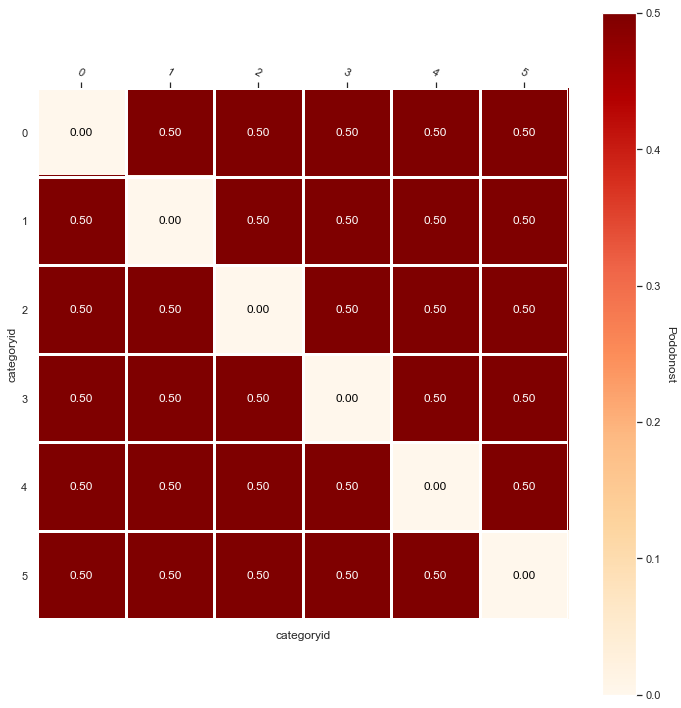

Matice podobnosti po učení na první části transakcí:


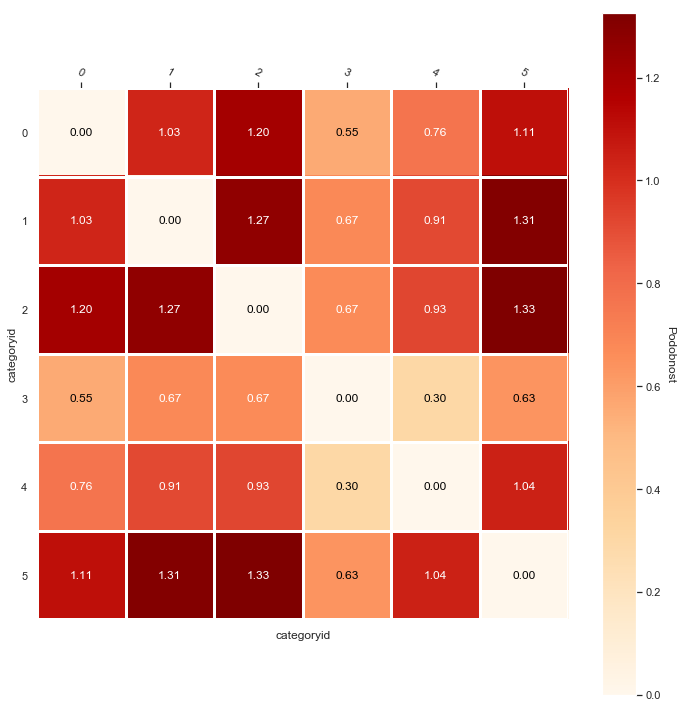

Matice podobnosti po přidání druhé části transakcí:


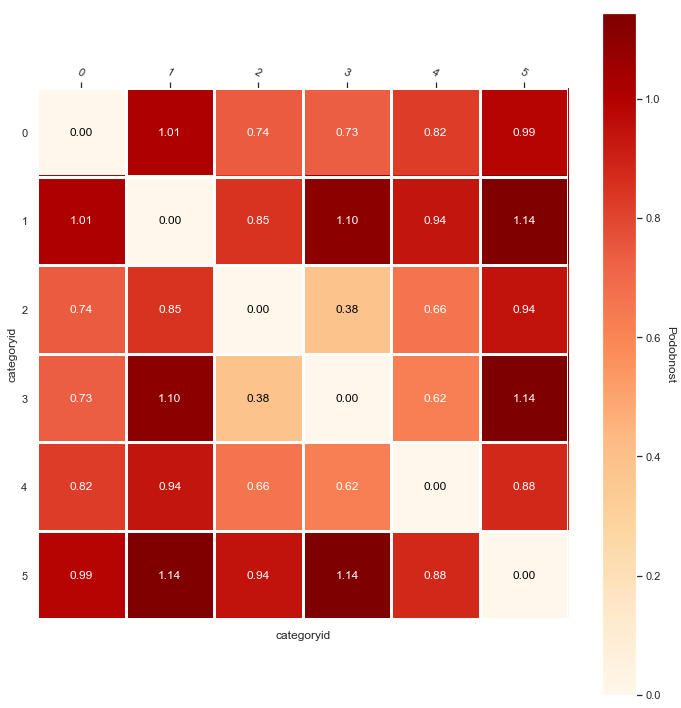

Matice podobnosti po přidání třetí části:


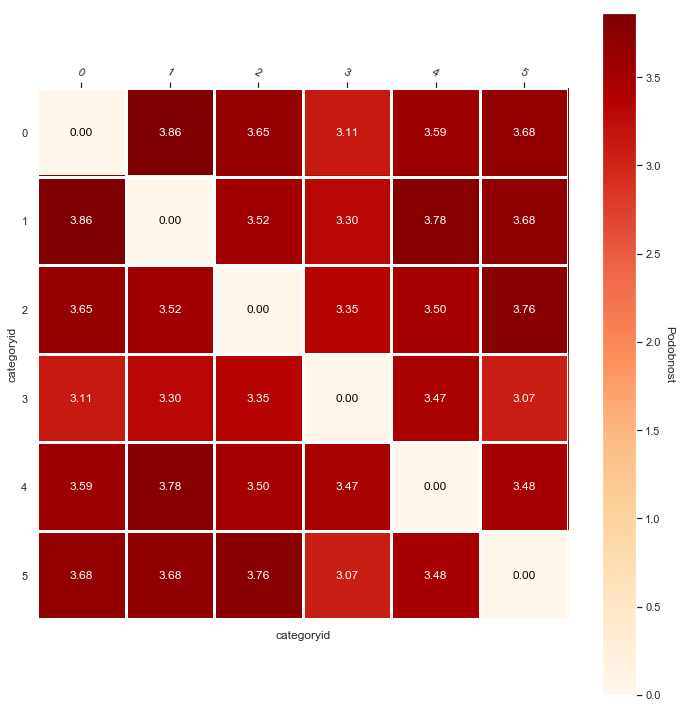

In [34]:
def showMatrix():
    sns.set(rc={'figure.figsize':(10, 10)})
    sns.set_style("dark")
    fig, ax = plt.subplots()
    im, cbar = heatmap(category_X_category, categories, categories, ax=ax,
                       cmap="OrRd", cbarlabel="Podobnost")
    texts = annotate_heatmap(im, valfmt="{x:.2f}")
    plt.xlabel('categoryid')
    plt.ylabel('categoryid')
    fig.tight_layout()
    plt.show()

print('Matice podobnosti před začátkem učení:')
showMatrix()

print('Matice podobnosti po učení na první části transakcí:')
for index, purchase in purchases_part_1.iterrows():
    updateMatrix(
        categories,
        customers,
        category_X_category,
        customer_X_category,
        purchase['categoryid'],
        purchase['customerid']
    )
showMatrix()

print('Matice podobnosti po přidání druhé části transakcí:')
for index, purchase in purchases_part_2.iterrows():
    updateMatrix(
        categories,
        customers,
        category_X_category,
        customer_X_category,
        purchase['categoryid'],
        purchase['customerid']
    )
showMatrix()

print('Matice podobnosti po přidání třetí části:')
for index, purchase in purchases_part_3.iterrows():
    updateMatrix(
        categories,
        customers,
        category_X_category,
        customer_X_category,
        purchase['categoryid'],
        purchase['customerid']
    )
showMatrix()

Rychlost učení je dána parametrem `promotion_rate` ve funkci `updateMatrixCategory()`. Důležitou částí každého AI projektu je úvaha nad tím, jak agresivně by mělo učení probíhat. To samé platí i pro zapomínání starších dat. V naší šabloně jsme implementovali zapomínání prostřednictvím funkce `normalizeMatrix()` a parametru `normalization_threshold`, po jehož překročení se matice normalizuje do intervalu 0-1. To je důvod, proč je podobnost kategorií 0 a 2 po učení na druhé části datasetu 0.74, přestože byla po první fázi učení 1.2.

### 2.3 Shrnutí experimentů

Existuje vícero cest, jak vytvořit nástroj pro personalizaci. V této šabloně jsme představili dva nejčastější postupy - ručně vytvořená pravidla a strojové učení za pomocí matice podobnosti. Každý způsob má své výhody a nevýhody:

**Ručně vytvořená pravidla**
- výhody
    - srozumitelnost
    - krátký výpočetní čas
    - nízké nároky na množství dat
- nevýhody
    - pracnější na přípravu (ruční analýza a tvorba pravidel)
    - rigidita (model se nepřizpůsobí změně podmínek sám od sebe)
    - údržba (model se musí průběžně manuálně upravovat)
    
**Strojové učení (matice podobnosti)**
- výhody
    - výkon se zlepšuje s přibývajícím množstvím dat
    - nízké nároky na údržbu (model se přizpůsobuje podmínkám)
- nevýhody
    - nároky na množství dat
    - výpočet trvá delší čas
    - menší srozumitelnost
    
V praxi se tyto přístupy často kombinují. Problematice dalších AI modelů se věnujeme v našem článku https://www.ecommerce-academy.cz/post/serial-uvod-do-ai-5

V této šabloně však hybridní model vytvářet nebudeme a přenecháme to čtenářům.

## Co dál?

Doufáme, že Vám tato šablona pomohla. Máte nápad na její vylepšení? Rádi byste začali s umělou inteligencí ve Vaší firmě? Dejte nám vědět, rádi to s Vámi proberem :)

Kontaktujte nás prostřednictvím našeho webu
- https://www.pbi.ai/

nebo sociálních sítí
- facebook https://www.facebook.com/pbiai/
- LinkedIn https://www.linkedin.com/company/18178189/
- Twitter https://twitter.com/pbi_ai

In [35]:
end_time = datetime.now()
print('end_time:', end_time)
print('elapsed_time:', end_time - start_time)

end_time: 2019-11-13 17:53:22.261753
elapsed_time: 0:13:17.437876
